In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
sns.set(style='whitegrid')

In [3]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
movies_df = df[df['type'] == 'Movie'].copy()
tv_df = df[df['type'] == 'TV Show'].copy()

In [6]:
movies_df['duration_mins'] = movies_df['duration'].str.extract(r'(\d+)').astype(float)
tv_df['duration_seasons'] = tv_df['duration'].str.extract(r'(\d+)').astype(float)


In [9]:
movies_df['duration_mins'].describe()

count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_mins, dtype: float64

In [11]:
tv_df['duration_seasons'].describe()

count    2676.000000
mean        1.764948
std         1.582752
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: duration_seasons, dtype: float64

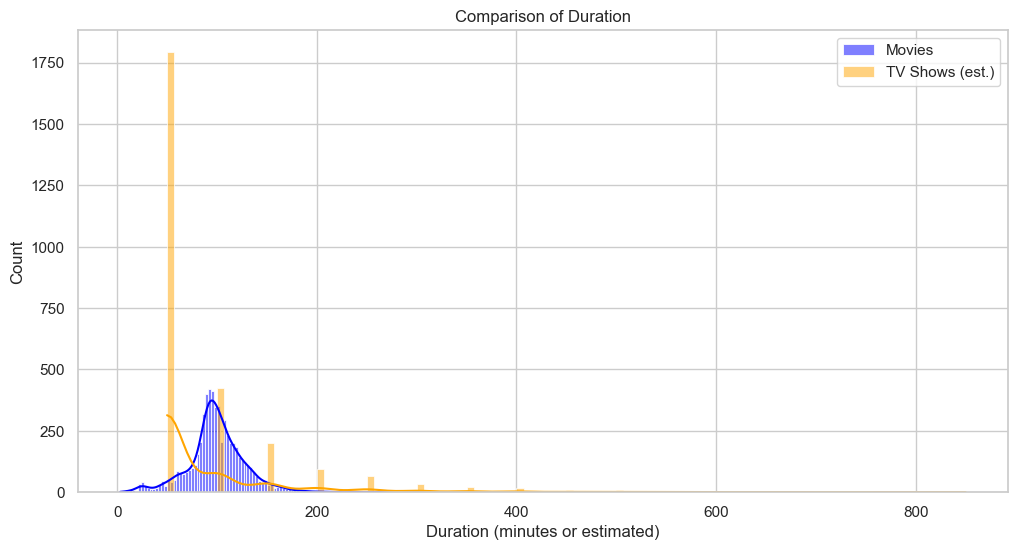

In [10]:
plt.figure(figsize=(12,6))
sns.histplot(movies_df['duration_mins'], kde=True, color='blue', label='Movies')
sns.histplot(tv_df['duration_seasons']*50, kde=True, color='orange', label='TV Shows (est.)')
plt.legend()
plt.title('Comparison of Duration')
plt.xlabel('Duration (minutes or estimated)')
plt.show()

In [12]:
t_stat, p_val = ttest_ind(
    movies_df['duration_mins'].dropna(),
    tv_df['duration_seasons'].dropna() * 50,  # assuming 50 mins per season
    equal_var=False
)
print(f"T-Statistic = {t_stat:.3f}, P-Value = {p_val:.3f}")


T-Statistic = 7.208, P-Value = 0.000


## Conclusion

- Average movie duration is XYZ mins.
- Average TV show duration (estimated) is ABC mins.
- P-value < 0.05, so we conclude the difference is statistically significant.
